In [131]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [132]:
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [133]:
warnings.filterwarnings('ignore')

In [134]:
%matplotlib inline

In [135]:
sns.set_theme(context = 'notebook' , style = 'ticks' , palette = 'Set1' , font_scale = 1.1 ,
              rc = {'figure.figsize' : (8,4)})

In [136]:
df = pd.read_csv('Used_Cars.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [137]:
df.duplicated().sum()

73

In [138]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [139]:
df.isnull().mean()*100

Brand           0.000000
Price           3.487828
Body            0.000000
Mileage         0.000000
EngineV         3.511236
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

In [140]:
df.dropna(axis = 0 , inplace = True)

In [141]:
df.reset_index(inplace = True , drop = True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3975 non-null   object 
 1   Price         3975 non-null   float64
 2   Body          3975 non-null   object 
 3   Mileage       3975 non-null   int64  
 4   EngineV       3975 non-null   float64
 5   Engine Type   3975 non-null   object 
 6   Registration  3975 non-null   object 
 7   Year          3975 non-null   int64  
 8   Model         3975 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 279.6+ KB


In [143]:
df['Brand'].value_counts().to_frame().T

,Volkswagen,Mercedes-Benz,BMW,Toyota,Renault,Audi,Mitsubishi
Brand,871,802,631,503,443,419,306


<AxesSubplot:xlabel='Brand', ylabel='count'>

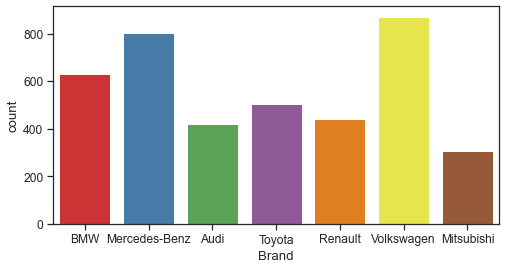

In [144]:
sns.countplot(df['Brand'])

In [145]:
df['Price'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Price,3975.0,19056.936091,24976.141632,600.0,6950.0,11400.0,21317.5,300000.0


<AxesSubplot:xlabel='Price'>

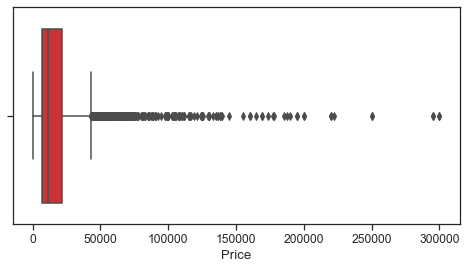

In [146]:
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

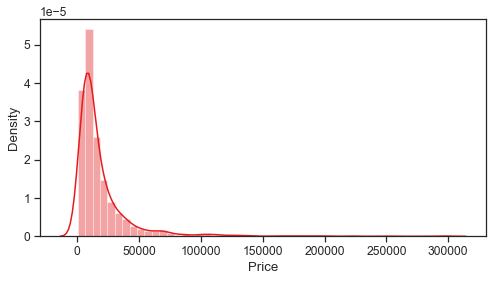

In [147]:
sns.distplot(df['Price'])

In [148]:
df['Body'].value_counts().to_frame().T

,sedan,crossover,van,other,vagon,hatch
Body,1518,805,617,391,376,268


<AxesSubplot:xlabel='Body', ylabel='count'>

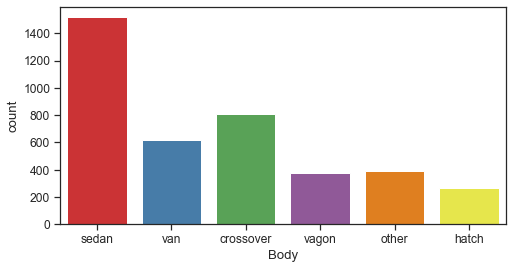

In [149]:
sns.countplot(df['Body'])

In [150]:
df['Mileage'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Mileage,3975.0,164.820126,103.117252,0.0,92.0,159.0,230.0,980.0


<AxesSubplot:xlabel='Mileage'>

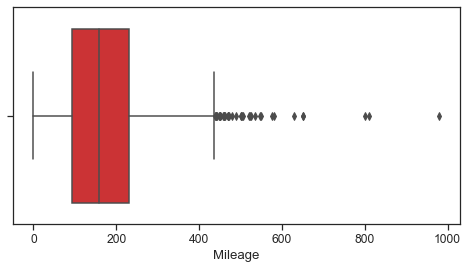

In [151]:
sns.boxplot(df['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

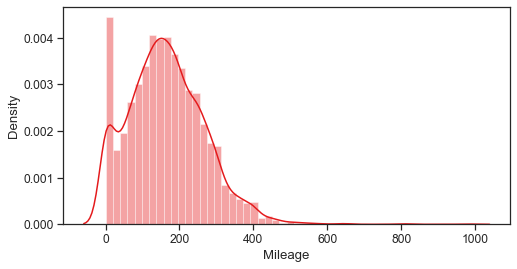

In [152]:
sns.distplot(df['Mileage'])

In [153]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [154]:
df['EngineV'].value_counts().to_frame()

,EngineV
2.00,682
3.00,479
2.50,338
1.60,310
2.20,273
...,...
30.00,1
15.00,1
1.79,1
0.65,1


In [155]:
df['Engine Type'].value_counts().to_frame().T

,Diesel,Petrol,Gas,Other
Engine Type,1832,1455,582,106


<AxesSubplot:xlabel='Engine Type', ylabel='count'>

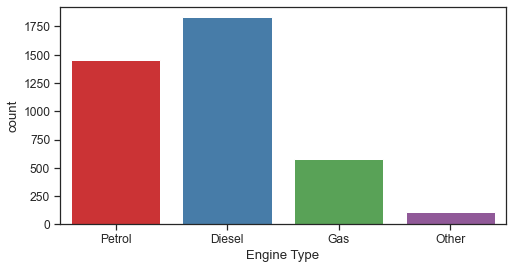

In [156]:
sns.countplot(df['Engine Type'])

In [157]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [158]:
df['Year'].value_counts().to_frame().T

,2008,2007,2012,2011,2013,2006,2016,2005,2010,2004,...,1987,1985,1986,1980,1979,1984,1978,1983,1969,1982
Year,391,334,332,294,239,199,191,176,167,156,...,18,12,11,3,3,3,2,2,1,1


In [159]:
df['Model'].value_counts()

E-Class    181
A6         156
Vito       153
Kangoo     136
Camry      125
          ... 
5            1
S5           1
CLK 240      1
Vista        1
Scion        1
Name: Model, Length: 306, dtype: int64

In [160]:
df.drop(['Model'] , axis = 1 ,inplace = True)

In [161]:
len(detect_outliers(df , 0 , ['Mileage']))

40

In [162]:
df.drop(detect_outliers(df, 0 , ['Mileage']) , axis = 0 , inplace = True)

In [163]:
col_to_encd = ['Brand' ,'Body' , 'Engine Type' ]

In [164]:
encoder = BinaryEncoder()

In [165]:
df = pd.concat([df , encoder.fit_transform(df[col_to_encd])] , axis = 1 )

In [166]:
df.drop(col_to_encd , axis = 1 , inplace = True)

In [167]:
mapper = {'yes' : 1 , 'no' : 0}

In [168]:
df['Registration'] = df['Registration'].map(mapper)

In [169]:
x = df.drop(['Price'] , axis = 1)
y = np.log(df['Price'])

In [226]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 3 
                                                        , test_size = 0.20)

In [227]:
df['logPrice'] = np.log(df['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='logPrice'>

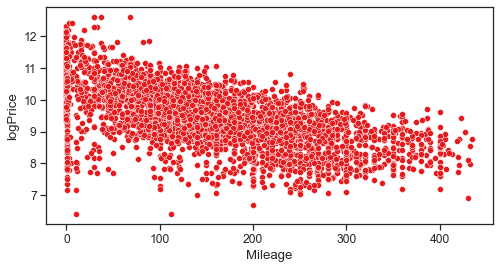

In [228]:
sns.scatterplot(data = df , x = 'Mileage' , y = 'logPrice')

<AxesSubplot:xlabel='Year', ylabel='logPrice'>

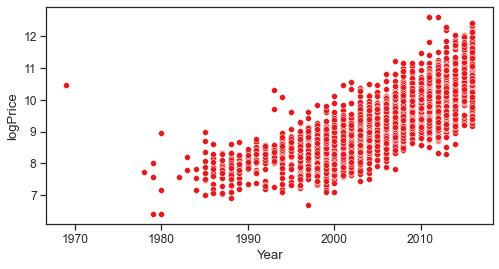

In [229]:
sns.scatterplot(data = df , x = 'Year' , y = 'logPrice')

In [230]:
col_to_scl = ['Mileage' , 'EngineV']

In [231]:
sclr = StandardScaler()

In [232]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [233]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

In [234]:
model = LinearRegression()

In [235]:
model.fit(x_train , y_train)

LinearRegression()

In [236]:
y_pred = model.predict(x_test)

In [237]:
mean_absolute_error(y_true = y_test , y_pred = y_pred)

0.2972883080070748

In [238]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

0.39669644996858994

In [239]:
r2_score(y_true = y_test , y_pred = y_pred)

0.8184991075015466